In [34]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression



In [35]:

just_join = pd.read_csv('job_offers_just_join.csv')
pracuj_pl = pd.read_csv('job_offers.csv')


In [36]:
# Polaczone tabele
tabela = pd.concat([just_join, pracuj_pl], ignore_index=True)

# Podgląd wyniku
display(tabela.head(10))

,Tytuł,Firma,Data opublikowania,Wynagrodzenie,Technologie,Link
0,Lead Java Engineer,N-iX,2025-01-08,25 392 - 30 716 pln,"['Fully remote', 'Spring Boot', 'Maven', 'Java']",https://justjoin.it/job-offer/n-ix-lead-java-e...
1,Senior C++ Software Engineer,HERE Technologies,2025-01-08,14 000 - 20 000 pln,"['Fully remote', 'C++', 'Python', 'TypeScript']",https://justjoin.it/job-offer/here-technologie...
2,Senior DevOps Engineer (AWS),Future Processing,2025-01-08,21 000 - 33 200 pln,"['Fully remote', 'AWS', 'Terraform', 'Kubernet...",https://justjoin.it/job-offer/future-processin...
3,Lead Data Engineer (Snowflake),N-iX,2025-01-08,26 620 - 32 764 pln,"['Fully remote', 'Cloud', 'DBT', 'SQL']",https://justjoin.it/job-offer/n-ix-lead-data-e...
4,QA Engineer,AVSystem,2025-01-08,10 000 - 18 000 pln,"['Networks', 'Gatling', 'Scripting language']",https://justjoin.it/job-offer/avsystem-qa-engi...
5,C++ Developer (Tuxedo),Experis Manpower Group,2025-01-08,26 880 - 28 560 pln,"['Fully remote', 'C++', 'Tuxedo']",https://justjoin.it/job-offer/experis-manpower...
6,Senior ReactJS Developer (with backend experie...,USEO Sp. z o.o.,2025-01-08,19 200 - 22 400 pln,"['Fully remote', 'ReactJS', 'TypeScript', 'CSS3']",https://justjoin.it/job-offer/useo-sp-z-o-o--s...
7,Data Engineer,Kitopi,2025-01-04,16 000 - 24 000 pln,"['Polish', 'English', 'Python']",https://justjoin.it/job-offer/kitopi-data-engi...
8,Angular Developer (Mid/Senior),Experis Manpower Group,2025-01-08,20 160 - 30 240 pln,"['Fully remote', 'TypeScript', 'RxJS', 'UI/UX']",https://justjoin.it/job-offer/experis-manpower...
9,Front-end Developer,Weegree Sp. z o.o.,2025-01-08,8 500 - 12 500 pln,"['HTML5', 'CSS3', 'React']",https://justjoin.it/job-offer/weegree-sp-z-o-o...


In [48]:
import re
# Uwzględnienie formatu zapisu wynagrodzenia "6 500–7 400" oraz "20 160 - 30 240 pln"
tabela['Wynagrodzenie'] = tabela['Wynagrodzenie'].str.replace('\u00a0', '').str.replace(' ', '')
# Usuwanie niepotrzebnych znaków i wyodrębnianie liczb
tabela['Wynagrodzenie_min'] = tabela['Wynagrodzenie'].apply(
    lambda x: int(re.findall(r'\d+', x.replace('zł', '').replace('pln', ''))[0])
    if re.findall(r'\d+', x.replace('zł', '').replace('pln', '')) else None
)
tabela['Wynagrodzenie_max'] = tabela['Wynagrodzenie'].apply(
    lambda x: int(re.findall(r'\d+', x.replace('zł', '').replace('pln', ''))[-1])
    if len(re.findall(r'\d+', x.replace('zł', '').replace('pln', ''))) > 1 else None
)
# Dodanie kolumny waluta
tabela['Waluta'] = tabela['Wynagrodzenie'].apply(
    lambda x: 'PLN' if 'pln' in x.lower() or 'zł' in x.lower() else 'EUR' if 'eur' in x.lower() else 'USD' if 'usd' in x.lower() else 'PLN'
)
# Możesz też obliczać średnią w dodatkowej kolumnie
tabela['Wynagrodzenie_avg'] = tabela[['Wynagrodzenie_min', 'Wynagrodzenie_max']].mean(axis=1)

print(tabela['Wynagrodzenie_avg'].describe())
display(tabela.head(-50))

count      534.000000
mean     19730.406367
std       8916.032825
min         35.000000
25%      12737.500000
50%      20800.000000
75%      26500.000000
max      39900.000000
Name: Wynagrodzenie_avg, dtype: float64


,Tytuł,Firma,Data opublikowania,Wynagrodzenie,Technologie,Link,Wynagrodzenie_min,Wynagrodzenie_max,Waluta,Wynagrodzenie_avg
0,Lead Java Engineer,N-iX,2025-01-08,25392-30716pln,"['Fully remote', 'Spring Boot', 'Maven', 'Java']",https://justjoin.it/job-offer/n-ix-lead-java-e...,25392.0,30716.0,PLN,28054.0
1,Senior C++ Software Engineer,HERE Technologies,2025-01-08,14000-20000pln,"['Fully remote', 'C++', 'Python', 'TypeScript']",https://justjoin.it/job-offer/here-technologie...,14000.0,20000.0,PLN,17000.0
2,Senior DevOps Engineer (AWS),Future Processing,2025-01-08,21000-33200pln,"['Fully remote', 'AWS', 'Terraform', 'Kubernet...",https://justjoin.it/job-offer/future-processin...,21000.0,33200.0,PLN,27100.0
3,Lead Data Engineer (Snowflake),N-iX,2025-01-08,26620-32764pln,"['Fully remote', 'Cloud', 'DBT', 'SQL']",https://justjoin.it/job-offer/n-ix-lead-data-e...,26620.0,32764.0,PLN,29692.0
4,QA Engineer,AVSystem,2025-01-08,10000-18000pln,"['Networks', 'Gatling', 'Scripting language']",https://justjoin.it/job-offer/avsystem-qa-engi...,10000.0,18000.0,PLN,14000.0
...,...,...,...,...,...,...,...,...,...,...
844,Business and systems Analyst (​​Capital Market...,Accenture Technology,2025-01-10,Brakwynagrodzenia,"""""",https://www.pracuj.pl/praca/business-and-syste...,NaN,NaN,PLN,NaN
845,Młodszy specjalista informatyk,Instytut Geodezji i Kartografii,2025-01-09,Brakwynagrodzenia,"""""",https://www.pracuj.pl/praca/mlodszy-specjalist...,NaN,NaN,PLN,NaN
846,IT Support Specialist,EndySoft,2025-01-09,8700–12200złnetto(+VAT)/mies.,"""""",https://www.pracuj.pl/praca/it-support-special...,8700.0,12200.0,PLN,10450.0
847,Techniczny Analityk Biznesowy,Acturis Poland Sp. z o.o.,2025-01-09,Brakwynagrodzenia,"""""",https://www.pracuj.pl/praca/techniczny-anality...,NaN,NaN,PLN,NaN


: 

In [38]:
# Zliczanie ogłoszeń z podanym wynagrodzeniem
with_salary = tabela[tabela['Wynagrodzenie'] != 'Brak wynagrodzenia'].shape[0]

# Zliczanie ogłoszeń bez podanego wynagrodzenia
without_salary = tabela[tabela['Wynagrodzenie'] == 'Brak wynagrodzenia'].shape[0]

print(f"Liczba ogłoszeń z podanym wynagrodzeniem: {with_salary}")
print(f"Liczba ogłoszeń bez podanego wynagrodzenia: {without_salary}")

# Zliczanie ogłoszeń z podanym wynagrodzeniem wskaźnik procentowy
with_salary_percent = with_salary / tabela.shape[0] * 100
print(f"Procent ogłoszeń z podanym wynagrodzeniem: {with_salary_percent:.2f}%")

# Zliczanie ogłoszeń bez podanego wynagrodzenia wskaźnik procentowy
without_salary_percent = without_salary / tabela.shape[0] * 100
print(f"Procent ogłoszeń bez podanego wynagrodzenia: {without_salary_percent:.2f}%")

# Zliczanie ofert pracy z wynagrodzeniem powyżej 10000 pln
above_10000 = tabela[tabela['Wynagrodzenie_min'] > 10000].shape[0]
print(f"Liczba ofert pracy z wynagrodzeniem powyżej 10000 zł: {above_10000}")
print(f"Procent ofert pracy z wynagrodzeniem powyżej 10000zł: {above_10000 / tabela.shape[0] * 100:.2f}%")

# Find the row with the highest salary
highest_offer_row = tabela.loc[tabela['Wynagrodzenie_min'].idxmax()]
highest_offer = highest_offer_row['Wynagrodzenie_min']

print(f"Ogłoszenie z najwyższym wynagrodzeniem: \n{highest_offer_row}")

lowest_offer_row = tabela.loc[tabela['Wynagrodzenie_min'].idxmin()]
# Sort the table by the 'Pierwsza_liczba' column to find the lowest offers
lowest_offers = tabela.sort_values(by='Wynagrodzenie_min').head(5)

print("5 ofert z najniższym wynagrodzeniem:")
print(lowest_offers[['Tytuł', 'Firma', 'Wynagrodzenie', 'Wynagrodzenie_min']])
lowest_offer = highest_offer_row['Wynagrodzenie_min']

#print(f"Ogłoszenie z najwyższym wynagrodzeniem: \n{lowest_offer_row}")


Liczba ogłoszeń z podanym wynagrodzeniem: 899
Liczba ogłoszeń bez podanego wynagrodzenia: 0
Procent ogłoszeń z podanym wynagrodzeniem: 100.00%
Procent ogłoszeń bez podanego wynagrodzenia: 0.00%
Liczba ofert pracy z wynagrodzeniem powyżej 10000 zł: 395
Procent ofert pracy z wynagrodzeniem powyżej 10000zł: 43.94%
Ogłoszenie z najwyższym wynagrodzeniem: 
Tytuł                               Full Stack Developer (Java + React)
Firma                                                      DevsData LLC
Data opublikowania                                           2025-01-10
Wynagrodzenie                                            34784-38263pln
Technologie                 ['Fully remote', 'React', 'Java', 'Spring']
Link                  https://justjoin.it/job-offer/devsdata-llc-ful...
Wynagrodzenie_min                                               34784.0
Wynagrodzenie_max                                               38263.0
Waluta                                                              PL

In [39]:
from collections import Counter

tabela['Technologie'] = tabela['Technologie'].replace('Brak technologii', '""')

wynik = tabela['Technologie'].explode().value_counts()
# Explode the 'Technologie' column and count the occurrences of each technology
technologie_list = tabela['Technologie'].dropna().apply(eval).explode()
wynik = Counter(technologie_list)

print(wynik)

Counter({'Fully remote': 277, '': 237, 'SQL': 124, 'Python': 85, 'Java': 73, 'JavaScript': 65, 'English': 43, 'Linux': 43, 'TypeScript': 35, 'AWS': 33, 'C#': 33, 'Git': 30, 'C++': 27, 'Jira': 26, 'PostgreSQL': 25, 'React': 22, 'Docker': 22, 'Node.js': 21, 'Active Directory': 21, 'Confluence': 18, 'C': 18, 'CSS': 18, 'Spring Boot': 17, 'Spring': 17, 'Azure': 16, 'HTML': 16, 'Oracle': 15, 'MySQL': 15, 'Kubernetes': 14, '.Net': 14, 'Windows Server': 14, '.NET': 14, 'Kotlin': 13, 'PHP': 13, 'MS SQL': 11, 'Angular': 11, 'Cloud': 10, 'Polish': 10, 'Power BI': 10, 'Terraform': 9, 'Windows': 9, 'Microsoft Excel': 9, 'CI/CD': 8, 'Hibernate': 8, 'Apache Kafka': 8, 'Agile': 8, 'SAP S/4 HANA': 7, 'Elasticsearch': 7, 'Golang': 7, 'Power Automate': 7, 'Symfony': 7, 'REST API': 7, 'UML': 7, 'BPMN': 7, 'React Native': 6, 'NoSQL': 6, 'Azure Data Factory': 6, 'Databricks': 6, 'Security': 6, 'iOS': 6, 'Playwright': 6, 'SAP': 6, 'AI': 6, 'Project Management': 6, 'REST': 6, 'Bash': 6, 'CSS3': 5, 'Redis': 5

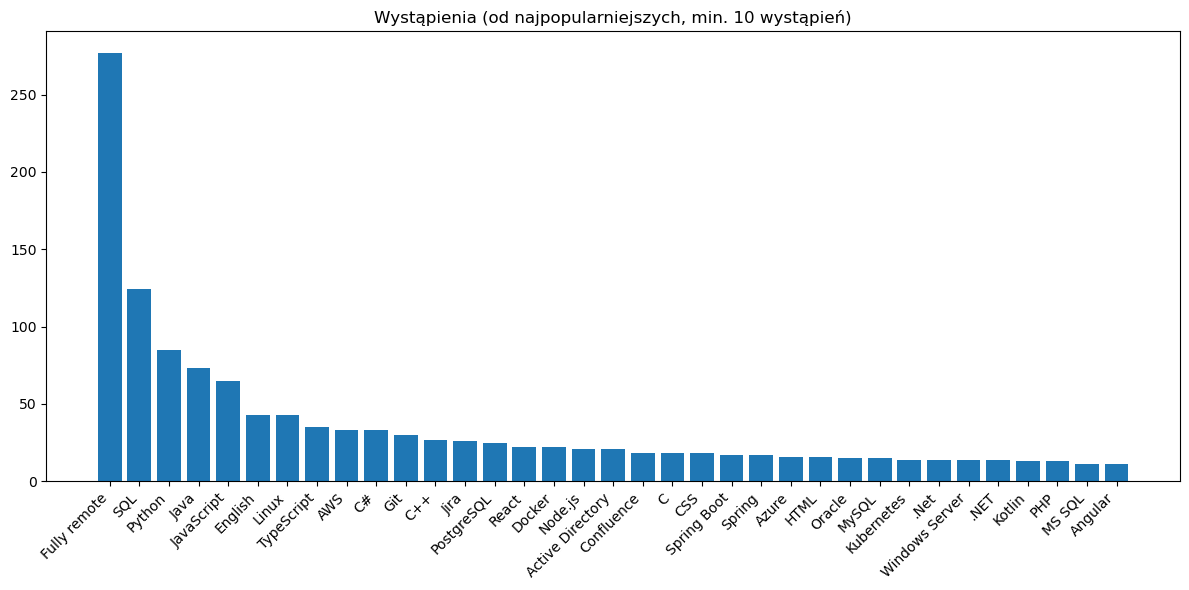

In [40]:
import matplotlib.pyplot as plt

filtered_counts = {tech: count for tech, count in wynik.items() if count > 10}
# Usunięcie pustej wartości w kolumnie
filtered_counts.pop('', None)
sorted_data = sorted(filtered_counts.items(), key=lambda x: x[1], reverse=True)

labels, counts = zip(*sorted_data)

plt.figure(figsize=(12, 6))
plt.bar(labels, counts)
plt.xticks(rotation=45, ha='right')
plt.title("Wystąpienia (od najpopularniejszych, min. 10 wystąpień)")
plt.tight_layout()
plt.show()

In [41]:
# Przekształcenie kolumny 'Technologie' na format odpowiedni do obliczeń
technologie_dummies = tabela['Technologie'].str.get_dummies(sep=', ')

# Dodanie kolumny z pierwszą liczbą wynagrodzenia do tabeli technologii
technologie_dummies['Wynagrodzenie_min'] = tabela['Wynagrodzenie_min']

# Obliczenie korelacji pomiędzy technologiami a zarobkami
correlation_matrix = technologie_dummies.corr()

# Wyświetlenie korelacji pomiędzy technologiami a zarobkami
correlation_with_salary = correlation_matrix['Wynagrodzenie_min'].drop('Wynagrodzenie_min')
#print(correlation_with_salary)
# Wyświetlenie 5 technologii z najwyższą korelacją z zarobkami
top_5_technologies = correlation_with_salary.abs().sort_values(ascending=False).head(5)
print(top_5_technologies)

worst_5_technologies = correlation_with_salary.abs().sort_values(ascending=True).head(5)
print(worst_5_technologies)


['Fully remote'       0.452413
""                    0.389747
'English'             0.174813
'Data Engineering'    0.157656
'Troubleshooting'     0.155369
Name: Wynagrodzenie_min, dtype: float64
'TypeScript']         0.000023
'Java 8']             0.000219
'MS Office']          0.000219
'Windows 10'          0.000219
'Microsoft Intune'    0.000219
Name: Wynagrodzenie_min, dtype: float64


Firma
Experis Manpower Group                     75
SCALO                                      26
Samsung R&D Institute Poland               18
ITDS                                       17
Accenture Technology                       13
ER Group                                   11
Jit Team                                   11
N-iX                                       11
Code and Pepper                             9
Tylko                                       8
Asseco Business Solutions S.A.              8
PREBYTES                                    8
HTD                                         8
Concentrix CVG International Sp. z o.o.     8
AVSystem                                    7
Name: count, dtype: int64


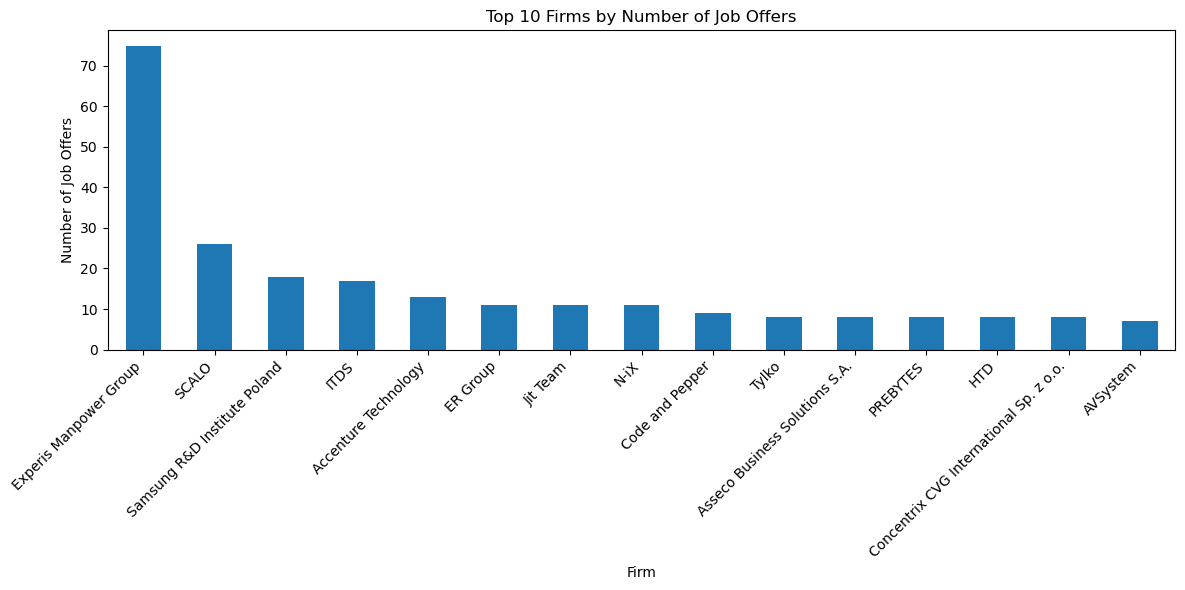

In [42]:
top_10_firms = tabela['Firma'].value_counts().head(15)
print(top_10_firms)
top_10_firms.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Firms by Number of Job Offers')
plt.xlabel('Firm')
plt.ylabel('Number of Job Offers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
experis_offers = tabela[tabela['Firma'] == 'Experis Manpower Group'].head(20)
print(experis_offers)

                                              Tytuł                   Firma  \
5                            C++ Developer (Tuxedo)  Experis Manpower Group   
8                    Angular Developer (Mid/Senior)  Experis Manpower Group   
11                              Front-end Architect  Experis Manpower Group   
12                          SAP Security Consultant  Experis Manpower Group   
13                               SAP ABAP Developer  Experis Manpower Group   
17                              SAP Fiori Developer  Experis Manpower Group   
21                           SAP Finance Consultant  Experis Manpower Group   
22                             SAP SD/MM Consultant  Experis Manpower Group   
23                SAP (WM/EWM) Logistics Consultant  Experis Manpower Group   
24        Power Apps Developer (MS Dynamics 365 CE)  Experis Manpower Group   
26  Identity and Access Management Support Engineer  Experis Manpower Group   
28                      Senior Scala/Java Developer 

In [44]:

tabela.to_csv('ofertyPracy.csv', index=False)

In [45]:
# Wczytanie pliku CSV
df = pd.read_csv('ofertyPracy.csv')

# Usunięcie duplikatów na podstawie kolumn o indeksach 0 i 1
df.drop_duplicates(subset=[df.columns[0], df.columns[1], df.columns[3]], inplace=True)

# Zapisanie zmodyfikowanego pliku CSV
df.to_csv('oferty_pracy_bez_duplikatow.csv', index=False)